# 청와대 국민청원 데이터
## 결측치 다루기 
* 데이터 출처 : https://github.com/akngs/petitions
* 전체 행 중에서 5%는 임의 필드 1개에 결측치 삽입
* 범주(category)가 '육아/교육'이고 투표수(votes)가 50건 초과이면 20% 확률로 투표수에 결측치 넣기
* 나머지는 전체 데이터와 동일

=> 위와 같이 임의로 만들어진 결측치를 다뤄본다.

In [ ]:
# 출력데이터가 지저분하게 보이지 않도록 warnings을 불러왔다.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from plotnine import *
print(pd.__version__)
print(np.__version__)

0.21.0
1.14.0


In [3]:
petitions = pd.read_csv('data/petition_corrupted.csv')
# 데이터의 크기가 어느정도인지 본다.
petitions.shape

(159770, 8)

In [4]:
# 위에서 3개의 데이터만 따로 추출해 본다.
# 그런데 컬럼명이 없는 것을 알 수 있다. 그래서 컬럼명을 지정해 주고 다시 불러오도록 한다.
petitions.head(3)

,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,"스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가 되고 있습니다.\n저는 우리가 너무 일찍 포기한 것이 아닌가 하는 생각을 갖고 있습니다.\n그리고, 추후 이 사고에 대한 확실한 해결이 없다면 나중에는 문재인 정부에 커다란 부담이 될 수도 있다는 생각에 이 글을 쓰게 되었습니다.\n가족들이 지금까지 갖고 있는 희망은 발견되지 않은 구명벌(땟목)에 선원들이 살아있지 않을까 하는 겁니다.\n생존 훈련받은 선원들이 대부분이고 구명벌에는 지붕과 생존도구가 구비되어있기 때문에 오랜 기간 버틸 수 있을 거라 보는 겁니다.\n이전 정권이 대선이전에 서둘러 수색을 중단한 탓도 있고, 정권교체 후 재수색이 있었지만,\n태평양, 3000m 수심이라는 데서, 애초 우리가 마음속에서 너무 일찍 포기한 게 아닌가 하는 생각이 듭니다.\n멕시코에서는 14개월 동안 표류하다 구조된 어부도 있고,\n과태말라에서 요트가 전복되어 태평양을 117일간 표류하던 어떤 부부가 한국어선에 의해 구조되는 일도 있었다는데,\n구명벌을 찾을 때 까지 포기하면 안된다고 생각합니다.\n구명벌이 침몰당시 분리된 것이 맞는지 확인하고,\n선박의 침몰 원인을 찾기 위해서도 심해를 탐사할 수 있는 장비를 통한 수색도 필요하다고 생각합니다.\n선박의 침몰에 대해서는 선사의 노후선박 개조와 사전 균열 등, 의혹이 제기되고 있는 상황입니다.\n구명벌이 선박에서 분리되지 못했다면 구명벌 수색은 필요 없는 것이 되고 침몰원인만 확인하면 되는 것입니다.\n물론 불가능하거나 실패할 수도 있지만 적어도 정부가 할 수 있는 모든 걸 했다는 것을 보여줘야 한다고 봅니다.\n침몰 당시 자동발신 조난신호의 위치나 수동발신 조난신호 발생위치가 확인되고 있고, AIS나 레이다, 인공위성사진 등을 이용하면 침몰위치 특정은 어려운 것이 아니고,\n현재 유인 심해 탐사정의 심해탐사기록이 일본 6500m, 중국 7,062m인 걸 보면 아주 불가능한 일은 아닐 수도 있다고 봅니다.\n애초에 사고가 발생했을 때 해수부는 국방부에 협조를 구해서 구조용 군함과 헬기를 지원 받고, 주변국과의 협조로 전방위적인 구명벌 수색을 했어야 한다고 봅니다.\n하지만, 지금은 구명벌이 조류와 바람에 의해 어디로 흘러갔을지 모르기 때문에 좀 더 넓은 지역에 대한 지속적인 구조용 선박과 헬기에 의한 수색과 주변 무인도에 대한 수색이 필요하다고 봅니다.\n나중에라도 구명벌이 발견되고 죽어있는 시신만 발견되었을 때 국가가 아무것도 안하고 있었다면 그 비난은 모두 현 정부에 주어지게 될 것이기 때문입니다.\n물론, 정부가 욕을 먹는 것은 작은 겁니다.\n중요한건 “사람이 먼저다”라는 가치를 지키는 것입니다.\n이런 공간을 마련해 주셔서 감사합니다."
0,22,2017-08-19,2017-11-17,0,17.0,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
1,23,2017-08-19,2017-09-03,0,0.0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
2,24,2017-08-19,2017-08-26,0,53.0,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...


### 컬럼명 지정

In [5]:
column_names = ['article_id','start','end','answered','votes','category','title','content']
petitions = pd.read_csv('data/petition_corrupted.csv', names = column_names, header=None)
petitions.head()

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9.0,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17.0,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0.0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53.0,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0.0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


* 컬럼명은 위와 같이 지정해 줄 수도 있지만, 하나씩 타이핑하기 귀찮다면 우리에겐 `petition_sampled.csv`가 있으니 해당 csv에서 샘플 컬럼을 불러오도록 한다.
* data 폴더에 있는 샘플 파일명을 확인한다.

In [6]:
%ls data

petition.csv            petition_corrupted.csv  petition_sampled.csv


In [7]:
# 샘플파일에는 컬럼이 존재한다.
petition_sample = pd.read_csv('data/petition_sampled.csv')
print(petition_sample.shape)
petition_sample.head()

(8029, 8)


,article_id,start,end,answered,votes,category,title,content
0,58,2017-08-19,2017-11-17,0,21,일자리,국토교통부와 한국주택협회가 행한 부당한 행위와 권력남용에 대한 내용을 청원드립니다.,안녕하세요? 존경하고 지지하는 문재인 대통령님!\n저는 성남시 분당구 정자동 주택전...
1,63,2017-08-20,2017-09-04,0,1,보건복지,살려주세요..,안녕하십니까?\n저는 올해 63세된 홀로 사는 늙은 여자입니다...\n작년 중복날 ...
2,136,2017-08-20,2017-11-18,0,4,육아/교육,고등학교 교육 내용 수준을 낮춰주시고 실용적인 내용을 담아주세요!,저는 광주에 사는 중3 학생입니다. 고등학교 가기 직전의 학년이라 어느 때보다 고등...
3,141,2017-08-20,2017-08-27,0,0,기타,한국문화에 창조적요소를 심자,안녕하십니까\n저는 92년 한국을 알게된 종국동포 입니다.\n[저는 한 중소기업에...
4,148,2017-08-20,2017-11-18,0,7,외교/통일/국방,다문화정책 및 할랄 인증 제도,대한민국과 국민을 위해 밤낮 없이 수고하시는 대통령을 비롯한 위정자 분들께\n대한민...


In [8]:
# 컬럼명을 지정해 준다
petition_columns = petition_sample.columns

In [9]:
petitions = pd.read_csv('data/petition_corrupted.csv', names = petition_columns, header=None)
petitions.head()

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9.0,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17.0,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0.0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53.0,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0.0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


## 결측치가 있는지 널 값을 세어본다.

In [10]:
petitions.isnull().sum()

article_id      0
start           0
end             0
answered        0
votes         192
category        0
title           0
content         1
dtype: int64

In [11]:
petitions = petitions.loc[petitions['end'] >= '2018-03-01']
petitions.shape

(58127, 8)

## 투표수 결측치 데이터프레임 생성

In [12]:
petition_votes_null = petitions.loc[petitions['votes'].isnull()]
petition_votes_null.shape

(72, 8)

In [13]:
petition_votes_null.head()

,article_id,start,end,answered,votes,category,title,content
101795,121399,2018-01-30,2018-03-01,0,NaN,육아/교육,대학원생의 인권을 되찾아 주세요,대학원 학생들좀 보호해 주십시오.\n-학생에게 할당된 인건비 횡령하는 교수님들 너무...
102638,122512,2018-01-30,2018-03-01,0,NaN,육아/교육,초등학교 교사들에게 adhd등의 특수아동에 대한 기본교육이수를 의무화 해주세요.,현재 우리 초등학교에는 수많은 adhd 아이들이 있습니다.\n하지만 담임선생님들중에...
103223,123229,2018-01-31,2018-03-02,0,NaN,육아/교육,미혼모 아이아빠를 꼭 찾아서 같이 책임질수 있게 해주세요,이번에 신생아 유기사건을 보고 맘이 참 아픕니다\n이런일이 일어나지 않도록 미리 ...
103417,124037,2018-01-31,2018-03-02,0,NaN,육아/교육,아동 관련법 강화 부탁드립니다.,"말 그대로 아동학대, 방치, 기타 등등 모든 아동들을 지킬 수 있는 국가시스템을 개..."
103706,124354,2018-02-01,2018-03-03,0,NaN,육아/교육,발달지연 바우처 증가와 통합어린이집 증설,안녕하세요.\n저는 김포시에 살고있는 자폐스팩트럼을 가진 5살 아이의 엄마입니다.\...


In [14]:
petition_votes_null.tail()

,article_id,start,end,answered,votes,category,title,content
152461,183973,2018-04-03,2018-05-03,0,NaN,육아/교육,김상곤 교육부총리의 해임을 청원합니다.,지금 현재 고1 학생을 둔 학부모입니다.\n2018년 현재 대한민국 대입정책은 유사...
156625,190975,2018-04-08,2018-05-08,0,NaN,육아/교육,"<보육교사의 호소> 저출산, 아동학대, 모든것은 하나로 이어져있습니다.",안녕하세요 부천 국공립 어린이집에서 9년째 근무하고 있는 보육교사입니다. 저는 보육...
158545,194252,2018-04-10,2018-05-10,0,NaN,육아/교육,아동당뇨 자동체크기허용,어제 방송에서 아동당뇨 자동체크기. 인슐린자동주입기 에대한 방송이나오더라구요 미국에...
159000,195019,2018-04-11,2018-05-11,0,NaN,육아/교육,스마트폰 관련 제한,요즘 아이들 스마트폰의 유해 컨텐츠에 노출되어 걱정입니다\n학생들이 스마트폰을 보며...
159083,195195,2018-04-11,2018-05-11,0,NaN,육아/교육,김상곤 교육부 장관 사퇴,현재 수시가 대입에서 대부분을 차지하고 있음에도 경쟁률이 큰 이 마당에 수시에서 수...


### 투표수에 결측치가 없는 데이터프레임 생성

In [15]:
petition_votes_notnull = petitions.loc[petitions['votes'].notnull()]
petition_votes_notnull.shape

(58055, 8)

In [16]:
import re
from konlpy.tag import Twitter
t = Twitter()

def preprocessing(text):
    text = str(text)
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    #text = t.pos(text, norm=True, stem=True)
    return text

In [17]:
pre_text = preprocessing(petition_votes_notnull['content'])
pre_text[:8]

'101644  '

In [18]:
# 참고 : https://gist.github.com/yong27/7869662
# http://www.racketracer.com/2016/07/06/pandas-in-parallel/
from multiprocessing import Pool
import numpy as np

def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)

def apply_by_multiprocessing(df, func, **kwargs):
    # 키워드 항목 중 workers 파라메터를 꺼냄
    workers = kwargs.pop('workers')
    # 위에서 가져온 workers 수로 프로세스 풀을 정의
    pool = Pool(processes=workers)
    # 실행할 함수와 데이터프레임을 워커의 수 만큼 나눠 작업
    result = pool.map(_apply_df, [(d, func, kwargs)
            for d in np.array_split(df, workers)])
    pool.close()
    # 작업 결과를 합쳐서 반환
    return pd.concat(list(result))

In [19]:
%time votes_notnull_content = apply_by_multiprocessing(\
    petition_votes_notnull['content'], preprocessing, workers=4)  

CPU times: user 544 ms, sys: 1.03 s, total: 1.57 s
Wall time: 1.63 s


In [20]:
#%time votes_notnull_content = petition_votes_notnull['content'].apply(preprocessing)

In [21]:
votes_notnull_content[:3]

101644     한마디로 똥묻은개가 생각납니다. 검사옷을 입을 자격이 없는 자입니다. 파면 시켜주십시요
101645    일제시대때 외국에 나가 살다가 현재는 3~4대까지 이어져온 분중에 대한민국 국민으로...
101646    6억이상에 대하여 종부세 매겨야  경제민주화 입니다ㆍ 어떤 국회의원은 12억 이상 ...
Name: content, dtype: object

In [22]:
#%time votes_null_content = petition_votes_null['content'].apply(preprocessing)
%time votes_null_content = apply_by_multiprocessing(\
    petition_votes_null['content'], preprocessing, workers=4)  

CPU times: user 16.8 ms, sys: 41.9 ms, total: 58.7 ms
Wall time: 99.2 ms


In [23]:
votes_null_content[:3]

101795    대학원 학생들좀 보호해 주십시오. -학생에게 할당된 인건비 횡령하는 교수님들 너무나...
102638    현재 우리 초등학교에는 수많은 adhd 아이들이 있습니다. 하지만 담임선생님들중에는...
103223    이번에 신생아 유기사건을 보고 맘이  참 아픕니다 이런일이 일어나지 않도록 미리 예...
Name: content, dtype: object

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2,
                             ngram_range=(1, 3),
                             max_features = 1000
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=1000, min_df=2,
        ngram_range=(1, 3), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [25]:
pipeline = Pipeline([
    ('vect', vectorizer),
])  

In [26]:
%time train_data_features = pipeline.fit_transform(votes_notnull_content)
train_data_features.shape

CPU times: user 1min 12s, sys: 2.18 s, total: 1min 14s
Wall time: 1min 14s


(58055, 1000)

In [27]:
%time test_data_features = pipeline.fit_transform(votes_null_content)
test_data_features.shape

CPU times: user 1.5 s, sys: 185 ms, total: 1.68 s
Wall time: 1.68 s


(72, 1000)

In [28]:
vocab = vectorizer.get_feature_names()
print(len(vocab))
vocab[:10]

1000


['12년의', '20', '2005년', '2018년', '2019학년도', '2년', '30', '3학년', '50', '80']

In [29]:
# 벡터화 된 피처를 확인해 봄
# Bag of words 에 몇 개의 단어가 들어있는지 확인
dist = np.sum(test_data_features, axis=0)
    
for tag, count in zip(vocab, dist):
    print(count, tag)
    
pd.DataFrame(dist, columns=vocab)

[[ 3  4  3  3  4  3  6  5  6  3  6  3  3  3 21  5  3  3  5  7  3  5  3  4
   4  9 22  5  5  3  5 14  3  3  4  4 20  9 18  5  3 25  5  3  5  5  4 12
   4  5  3  5  4  3 13  3  3  4  9  5  5  3 13  3 13  3  4  4  6  3  8  3
   5  4 17  4  6  3 13  4  3  5  4 12 10  9  3  3  3 15  6  3  6  6  4  4
   6  3  3  3  7  7  4 12  8 11 10  9  9  3  3 31  4  3  7  7  7  5  3  3
   5  3  3  3  3  5  6  3  9  3  5  5  3  3  3  6  3  4  3 11  4  5  4 20
   5  6  3  9  4  3  3  3  4  3  3  3  3  3 17  9  5  3  8  3  7  3  9  4
   3 14  3  3  3  5  7  3  5  3  4  3  9  4  9  7 15 11  3  4 17  3 12  3
   5  4  3  4  4  4  4  3 12  3  6  4  5  6 20  3  3  5  4  4  6  7 10  4
  22 14 30  3  4  5  3  3  7  5 16 27 23  5  4 12  5  3  3  3  4  3  4  4
   3  5  3  9  3 22  6 29  3  5  5  5  9  3  3  4  4  7  5 23  3  3  8  8
   3  4  3  3 11  5  5  5  3  3  7  3 10  4  5  3  3  3  7  3  3  3  5  9
   5  3  3  7  3  5  8  3  9  4  3  4  3  3  7  3  7  4  3  5  4  7  3  3
   3  3  6  3  3  4  3  4  5  6  4  6 

,12년의,20,2005년,2018년,2019학년도,2년,30,3학년,50,80,...,후의 현장은,후의 현장은 어떨까요,훨씬,휴가,휴게시간,휴게시간 포함한,휴게시간 포함한 한시간,희망을,힘든,힘든 상황
0,3,4,3,3,4,3,6,5,6,3,...,2,2,4,2,2,2,2,4,3,2


In [30]:
# 각 row에서 전체 단어가방에 있는 어휘에서 등장하는 단어에 대한 one-hot-vector
pd.DataFrame(test_data_features[:10].toarray(), columns=vocab).head()

,12년의,20,2005년,2018년,2019학년도,2년,30,3학년,50,80,...,후의 현장은,후의 현장은 어떨까요,훨씬,휴가,휴게시간,휴게시간 포함한,휴게시간 포함한 한시간,희망을,힘든,힘든 상황
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
X_train = train_data_features
X_train.shape

(58055, 1000)

In [32]:
X_test = test_data_features
X_test.shape

(72, 1000)

In [33]:
y_train = petition_votes_notnull['votes']
y_train.shape

(58055,)

In [34]:
X_test

<72x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 4213 stored elements in Compressed Sparse Row format>

In [35]:
X_test[2][:100]

<1x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 26 stored elements in Compressed Sparse Row format>

# DecisionTree로 투표수 예측

In [36]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5, random_state=2015)

In [37]:
%time dt = dt.fit(X_train, y_train)

CPU times: user 214 ms, sys: 14.5 ms, total: 229 ms
Wall time: 228 ms


In [38]:
dt_result = dt.predict(X_test)
dt_result

array([ 126.2448916 ,  126.2448916 ,  126.2448916 ,  191.19178082,
        126.2448916 ,  126.2448916 ,  892.35416667,  126.2448916 ,
        126.2448916 ,  126.2448916 ,  126.2448916 ,  126.2448916 ,
        126.2448916 ,  126.2448916 ,  126.2448916 ,  126.2448916 ,
        126.2448916 ,  126.2448916 ,  126.2448916 ,  126.2448916 ,
        126.2448916 ,  126.2448916 ,  126.2448916 , 5508.94230769,
        126.2448916 ,  126.2448916 ,  126.2448916 ,  126.2448916 ,
        126.2448916 ,  126.2448916 ,  126.2448916 ,  126.2448916 ,
        126.2448916 ,  126.2448916 ,  126.2448916 ,  126.2448916 ,
        126.2448916 ,  126.2448916 ,  126.2448916 ,  126.2448916 ,
        126.2448916 ,  126.2448916 ,  126.2448916 ,  126.2448916 ,
        126.2448916 ,  126.2448916 ,  126.2448916 ,  126.2448916 ,
        126.2448916 ,  126.2448916 ,  126.2448916 ,  126.2448916 ,
        126.2448916 ,  126.2448916 ,  126.2448916 ,  126.2448916 ,
        126.2448916 ,  126.2448916 ,  126.2448916 ,  126.24489

In [39]:
# brew install graphviz
# conda install graphviz
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt, out_file = "decision-tree.dot")

with open("decision-tree.dot") as f:
    dot_graph = f.read()

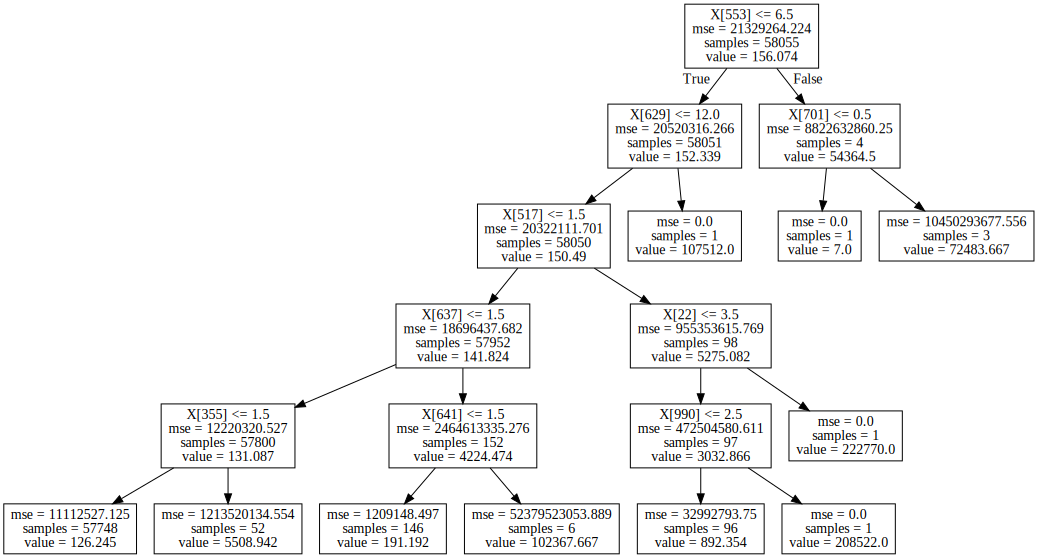

In [40]:
graphviz.Source(dot_graph)

# RamdomForest로 투표수 예측

In [41]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(
    n_estimators = 100, n_jobs = -1, random_state=2018)
forest

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=2018, verbose=0, warm_start=False)

In [42]:
%time forest = forest.fit(X_train, y_train)

CPU times: user 2h 8min 34s, sys: 21.3 s, total: 2h 8min 55s
Wall time: 33min 49s


In [43]:
result = forest.predict(X_test)
result

array([8.33543764e+02, 3.73650000e+02, 3.27523333e+01, 1.71820000e+02,
       1.20465667e+03, 4.57421069e+02, 2.71977000e+03, 5.50640000e+02,
       9.31071667e+02, 3.76656226e+01, 1.69198114e+03, 2.48379800e+03,
       5.49187700e+03, 1.67360000e+01, 3.05981333e+02, 2.21503500e+03,
       2.59410473e+01, 6.01325974e+00, 2.97423000e+03, 7.87490000e+02,
       3.87770000e+02, 3.60667500e+02, 7.79950000e+01, 8.32250000e+02,
       1.46758333e+01, 6.21753333e+02, 1.00239000e+03, 8.95315909e+01,
       7.71150000e+01, 3.09955333e+02, 1.32365167e+03, 1.83392500e+03,
       1.22069385e+03, 1.86889333e+03, 2.51380000e+02, 4.10192300e+04,
       4.21300000e+01, 5.60787793e+01, 3.48260500e+04, 4.62200000e+01,
       1.61211625e+03, 4.50866667e+01, 4.05902033e+01, 2.21478500e+03,
       5.19892273e+01, 1.34570700e+04, 1.67775000e+02, 6.45500000e+00,
       9.11960714e+02, 2.10011000e+02, 1.71694600e+04, 2.64816667e+01,
       1.18635592e+01, 2.13265820e+01, 4.60911111e+00, 1.26712500e+02,
      

In [44]:
result.shape

(72,)

In [45]:
# 결과값만 따로 모아 본다.
output = pd.DataFrame(data={'article_id':petition_votes_null['article_id'], 'votes':result})
output.head()

,article_id,votes
101795,121399,833.543764
102638,122512,373.650000
103223,123229,32.752333
103417,124037,171.820000
103706,124354,1204.656667


In [46]:
# 어떤 데이터의 투표수인지 보기 위해 article_id로 데이터를 불러온다.
petition_votes_null.loc[petition_votes_null['article_id'] == 121399]

,article_id,start,end,answered,votes,category,title,content
101795,121399,2018-01-30,2018-03-01,0,NaN,육아/교육,대학원생의 인권을 되찾아 주세요,대학원 학생들좀 보호해 주십시오.\n-학생에게 할당된 인건비 횡령하는 교수님들 너무...


In [47]:
# 투표수를 결측치에 넣어준다.
petition_votes_null['votes_predict'] = result
petition_votes_null['votes_predict_dt'] = dt_result

In [48]:
petition_votes_null

,article_id,start,end,answered,votes,category,title,content,votes_predict,votes_predict_dt
101795,121399,2018-01-30,2018-03-01,0,NaN,육아/교육,대학원생의 인권을 되찾아 주세요,대학원 학생들좀 보호해 주십시오.\n-학생에게 할당된 인건비 횡령하는 교수님들 너무...,833.543764,126.244892
102638,122512,2018-01-30,2018-03-01,0,NaN,육아/교육,초등학교 교사들에게 adhd등의 특수아동에 대한 기본교육이수를 의무화 해주세요.,현재 우리 초등학교에는 수많은 adhd 아이들이 있습니다.\n하지만 담임선생님들중에...,373.650000,126.244892
103223,123229,2018-01-31,2018-03-02,0,NaN,육아/교육,미혼모 아이아빠를 꼭 찾아서 같이 책임질수 있게 해주세요,이번에 신생아 유기사건을 보고 맘이 참 아픕니다\n이런일이 일어나지 않도록 미리 ...,32.752333,126.244892
103417,124037,2018-01-31,2018-03-02,0,NaN,육아/교육,아동 관련법 강화 부탁드립니다.,"말 그대로 아동학대, 방치, 기타 등등 모든 아동들을 지킬 수 있는 국가시스템을 개...",171.820000,191.191781
103706,124354,2018-02-01,2018-03-03,0,NaN,육아/교육,발달지연 바우처 증가와 통합어린이집 증설,안녕하세요.\n저는 김포시에 살고있는 자폐스팩트럼을 가진 5살 아이의 엄마입니다.\...,1204.656667,126.244892
106540,127795,2018-02-05,2018-03-07,0,NaN,육아/교육,역사교과서 개정안 반대,6.25전쟁\n김일성이라는 독재자가 자유민주주의국가인 한국을 공산화하기 위해 벌여 ...,457.421069,126.244892
109893,131763,2018-02-07,2018-03-09,0,NaN,육아/교육,고등학교 학교생활기록부(학생부) 개편안 무효화를 청원합니다.,"안녕하십니까, 저희는 올해 고등학생이 되는 청소년들입니다.\n얼마 전 교육부에서 고...",2719.770000,892.354167
114530,137376,2018-02-12,2018-03-14,0,NaN,육아/교육,어린이집 교사 처우 개선 할 수 있게 부탁 드립니다.,수고 많으십니다.\n항상 열린 마음으로 국민들의 이야기를 들어 주셔서 먼저 감사드립...,550.640000,126.244892
117376,140679,2018-02-16,2018-03-18,0,NaN,육아/교육,학교 두발규정을 없애주세요.,친애하는 문재인 대통령님. 학교에서는 약 한달에 한번씩 두발검사를 합니다. 그러나 ...,931.071667,126.244892
117476,140799,2018-02-16,2018-03-18,0,NaN,육아/교육,유치원은 왜 현금결제만?,"이번에 유치원 전쟁을 치룬 엄마입니다. 입학만 되면 감사한 이런분위기에 놀라고, ...",37.665623,126.244892


In [49]:
petitions_notnull = pd.read_csv('data/petition.csv') 

In [50]:
# 원래 데이터의 투표수를 본다.
petitions_notnull.loc[petitions_notnull['article_id'] == 183021]

,article_id,start,end,answered,votes,category,title,content
151744,183021,2018-04-02,2018-05-02,0,155,육아/교육,월요일을 주말로해주세요,갈수록 힘들어지는 나날과 휴식이 더욱이 중요해지는 이날에 5일나가고2일쉬기란 다음날...


In [51]:
petitions_notnull.loc[petitions_notnull['article_id'] == 181276]

,article_id,start,end,answered,votes,category,title,content
150358,181276,2018-03-30,2018-04-29,0,1936,육아/교육,2019학년도부터 정시확대 요구합니다,올해 수능을 준비하는 학생입니다.지금 2020학년도부터 정시확대를 하도록 교육부가 ...


In [52]:
# 원래 데이터와 예측한 수의 차이가 어느정도인지 본다.
petition_votes_null['votes'] = petitions_notnull['votes']
petition_votes_null['votes_diff'] = petitions_notnull['votes'] - petition_votes_null['votes_predict'] 
petition_votes_null['votes_diff_dt'] = petitions_notnull['votes'] - petition_votes_null['votes_predict_dt'] 

In [53]:
petition_votes_null

,article_id,start,end,answered,votes,category,title,content,votes_predict,votes_predict_dt,votes_diff,votes_diff_dt
101795,121399,2018-01-30,2018-03-01,0,79,육아/교육,대학원생의 인권을 되찾아 주세요,대학원 학생들좀 보호해 주십시오.\n-학생에게 할당된 인건비 횡령하는 교수님들 너무...,833.543764,126.244892,-754.543764,-47.244892
102638,122512,2018-01-30,2018-03-01,0,187,육아/교육,초등학교 교사들에게 adhd등의 특수아동에 대한 기본교육이수를 의무화 해주세요.,현재 우리 초등학교에는 수많은 adhd 아이들이 있습니다.\n하지만 담임선생님들중에...,373.650000,126.244892,-186.650000,60.755108
103223,123229,2018-01-31,2018-03-02,0,1496,육아/교육,미혼모 아이아빠를 꼭 찾아서 같이 책임질수 있게 해주세요,이번에 신생아 유기사건을 보고 맘이 참 아픕니다\n이런일이 일어나지 않도록 미리 ...,32.752333,126.244892,1463.247667,1369.755108
103417,124037,2018-01-31,2018-03-02,0,72,육아/교육,아동 관련법 강화 부탁드립니다.,"말 그대로 아동학대, 방치, 기타 등등 모든 아동들을 지킬 수 있는 국가시스템을 개...",171.820000,191.191781,-99.820000,-119.191781
103706,124354,2018-02-01,2018-03-03,0,82,육아/교육,발달지연 바우처 증가와 통합어린이집 증설,안녕하세요.\n저는 김포시에 살고있는 자폐스팩트럼을 가진 5살 아이의 엄마입니다.\...,1204.656667,126.244892,-1122.656667,-44.244892
106540,127795,2018-02-05,2018-03-07,0,63,육아/교육,역사교과서 개정안 반대,6.25전쟁\n김일성이라는 독재자가 자유민주주의국가인 한국을 공산화하기 위해 벌여 ...,457.421069,126.244892,-394.421069,-63.244892
109893,131763,2018-02-07,2018-03-09,0,1636,육아/교육,고등학교 학교생활기록부(학생부) 개편안 무효화를 청원합니다.,"안녕하십니까, 저희는 올해 고등학생이 되는 청소년들입니다.\n얼마 전 교육부에서 고...",2719.770000,892.354167,-1083.770000,743.645833
114530,137376,2018-02-12,2018-03-14,0,91,육아/교육,어린이집 교사 처우 개선 할 수 있게 부탁 드립니다.,수고 많으십니다.\n항상 열린 마음으로 국민들의 이야기를 들어 주셔서 먼저 감사드립...,550.640000,126.244892,-459.640000,-35.244892
117376,140679,2018-02-16,2018-03-18,0,144,육아/교육,학교 두발규정을 없애주세요.,친애하는 문재인 대통령님. 학교에서는 약 한달에 한번씩 두발검사를 합니다. 그러나 ...,931.071667,126.244892,-787.071667,17.755108
117476,140799,2018-02-16,2018-03-18,0,307,육아/교육,유치원은 왜 현금결제만?,"이번에 유치원 전쟁을 치룬 엄마입니다. 입학만 되면 감사한 이런분위기에 놀라고, ...",37.665623,126.244892,269.334377,180.755108
